# CSCI 580 – Assignment 5: Perceptron
**Name:** Aaron Partridge  
**Date:** April 2025  


# Part 1: Heuristic Perceptron

In this section, we will:
- Load and visualize the dataset
- Implement the perceptron using the heuristic approach
- Visualize how the decision boundary evolves across iterations
- Analyze the impact of the learning rate on convergence


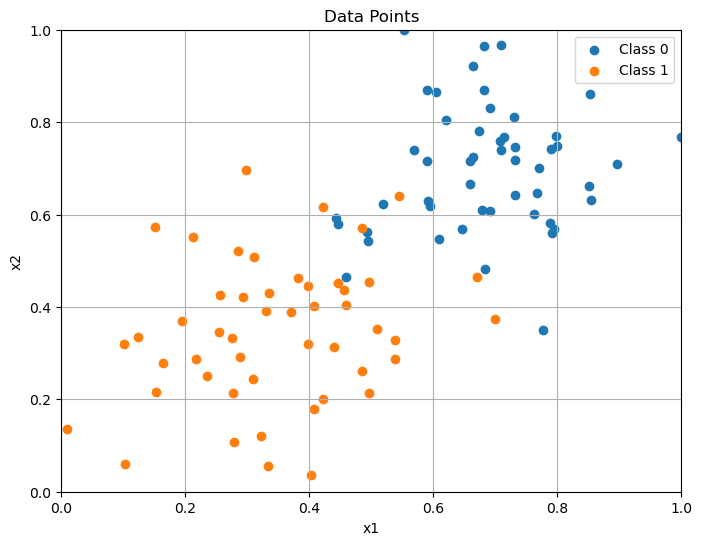

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv', header=None, names=['x1', 'x2', 'label'])

X = data[['x1', 'x2']].values
y = data['label'].values

plt.figure(figsize=(8, 6))
for label in set(y):
    plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Class {label}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Points')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()





## Heuristic Perceptron Training

We apply the update rules from the heuristic perceptron algorithm.
A red line shows the initial boundary, dashed green lines show updates after each epoch, and a final black line shows the final decision boundary.


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(w, b, color='g--', label=None):
    x_vals = np.array([0, 1])  # fixed range
    if w[1] != 0:
        y_vals = -(w[0] * x_vals + b) / w[1]
        plt.plot(x_vals, y_vals, color, label=label)
    else:
        plt.axvline(x=-b / w[0], color=color[0], linestyle=color[1:], label=label)



def heuristic_perceptron(X, y, learning_rate=1.0, max_iter=20):
    w = np.random.randn(2)
    b = np.random.randn()

    plt.figure(figsize=(8, 6))
    for label in set(y):
        plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Class {label}')
    plot_decision_boundary(w, b, color='r-', label='Initial')

    for epoch in range(max_iter):
        errors = 0
        for i in range(len(X)):
            x_i = X[i]
            y_true = y[i]
            y_pred = 1 if np.dot(w, x_i) + b >= 0 else 0
            if y_pred != y_true:
                if y_true == 1:
                    w += learning_rate * x_i
                    b += learning_rate
                else:
                    w -= learning_rate * x_i
                    b -= learning_rate
                errors += 1

        plot_decision_boundary(w, b, color='g--')

        if errors == 0:
            break

    plot_decision_boundary(w, b, color='k-', label='Final')
    plt.title(f'Heuristic Perceptron (lr={learning_rate}, epochs={epoch+1})')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return w, b





## Try Different Learning Rates

We now run the heuristic perceptron with three different learning rates: 0.01, 0.1, and 1.0.


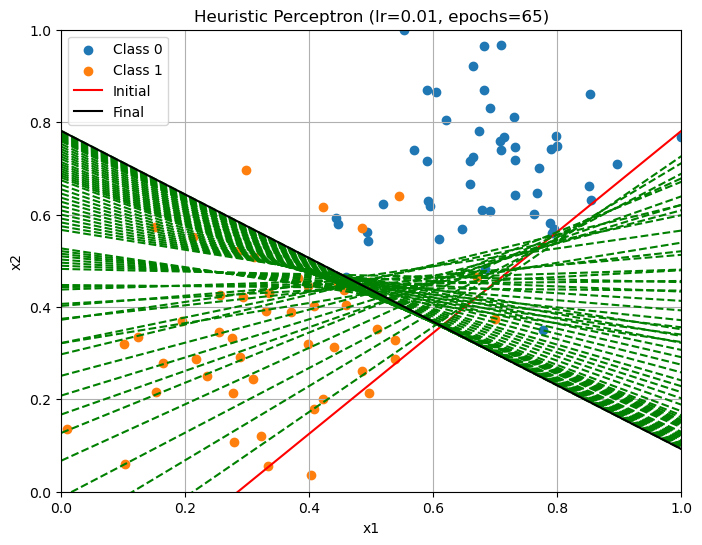

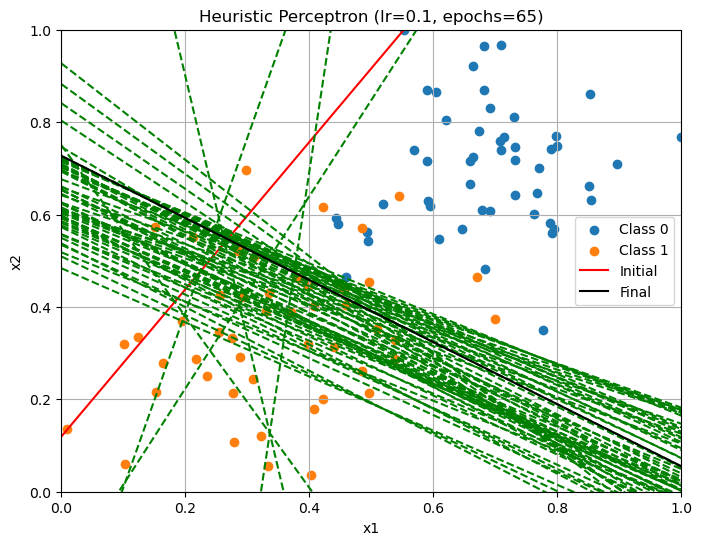

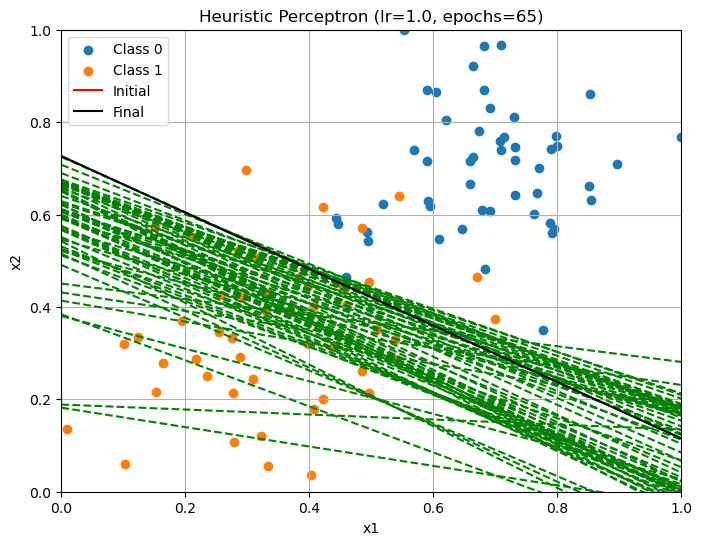

In [28]:
for lr in [0.01, 0.1, 1.0]:
    heuristic_perceptron(X, y, learning_rate=lr, max_iter=65)



## Heuristic Analysis

- **Low learning rate (0.01)**: convergence is slow, and more green lines appear before the model stops updating.
- **Medium learning rate (0.1)**: more efficient convergence while maintaining stability.
- **High learning rate (1.0)**: converges quickly but may overshoot, causing oscillations.

Smaller learning rates improve control but take more time, while larger ones speed things up but can destabilize learning.


# Part 2: Gradient Descent Perceptron

Now we implement the perceptron using gradient descent and soft outputs via the sigmoid function.

We'll also track and plot the log loss every 10 epochs.


In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


In [15]:
def gradient_descent_perceptron(X, y, learning_rate=0.1, epochs=100):
    w = np.random.randn(2)
    b = np.random.randn()
    losses = []

    plt.figure(figsize=(8, 6))
    for label in set(y):
        plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Class {label}')
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plot_decision_boundary(w, b, color='r-', label='Initial')

    for epoch in range(1, epochs + 1):
        for i in range(len(X)):
            x_i = X[i]
            y_true = y[i]
            z = np.dot(w, x_i) + b
            y_hat = sigmoid(z)
            error = y_true - y_hat

            w += learning_rate * error * x_i
            b += learning_rate * error

        plot_decision_boundary(w, b, color='g--')

        if epoch % 10 == 0:
            y_preds = sigmoid(np.dot(X, w) + b)
            loss = log_loss(y, y_preds)
            losses.append((epoch, loss))

    plot_decision_boundary(w, b, color='k-', label='Final')

    plt.title(f'Gradient Descent Perceptron (lr={learning_rate}, epochs={epochs})')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.show()

    return w, b, losses


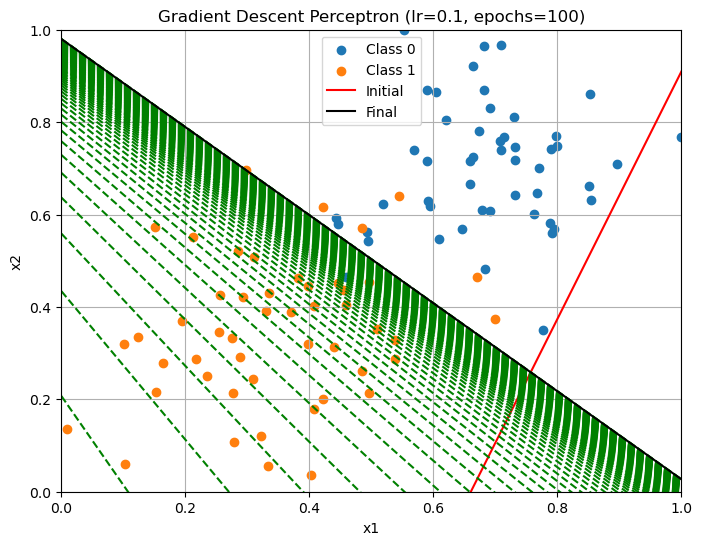

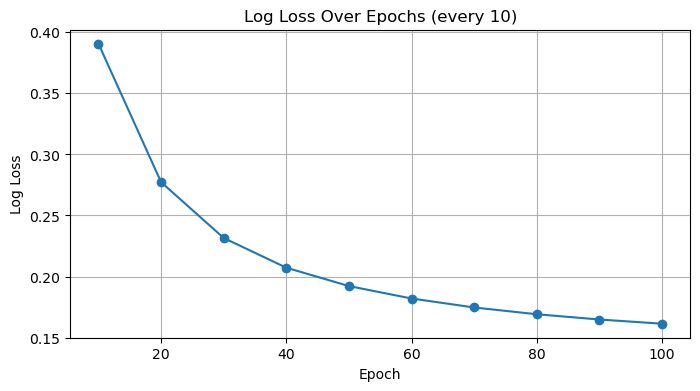

In [17]:
w, b, losses = gradient_descent_perceptron(X, y, learning_rate=0.1, epochs=100)

epochs, loss_vals = zip(*losses)
plt.figure(figsize=(8, 4))
plt.plot(epochs, loss_vals, marker='o')
plt.title('Log Loss Over Epochs (every 10)')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()


## Gradient Descent Analysis

- The log loss steadily decreases, indicating the model is learning.
- More frequent green lines show smoother boundary shifts compared to the heuristic model.
- Learning rate tuning is important — too high may cause instability, too low may require many epochs.

The final boundary visually matches the class separation, showing effective convergence.
